In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
data = pd.read_csv("PC1.csv")
data = data.replace('?', np.nan)
data = data.dropna()
data


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,6,0,0,2,10.0,3.0,18.0,8.0,7.0,False
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,10,0,0,1,14.0,5.0,28.0,15.0,9.0,False
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,5,0,0,0,8.0,5.0,11.0,6.0,5.0,False
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,18,0,0,1,22.0,24.0,61.0,50.0,15.0,False


In [3]:
model = LinearRegression()

X = data.drop('defects', axis=1)
y = data['defects'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 7: Perform feature selection using SelectKBest
k = 20  # Set the desired number of top features
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
selected_features_list = selected_features.tolist()  # Convert to list
print("Selected Features:", selected_features_list)

model.fit(X_train_selected, y_train)
y_pred_prob = model.predict(X_test_selected)


Selected Features: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


In [4]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print(coefficients)

Root Mean Squared Error: 0.26635435181205913
R-squared: 0.09348310248924419
              Feature  Coefficient
0                 loc     0.331957
1                v(g)    -0.002415
2               ev(g)    -0.001002
3               iv(g)    -0.006381
4                   n    -3.822926
5                   v     0.000355
6                   d    -0.002835
7                   i    -0.000802
8                   e     0.069690
9                   b    -1.341790
10                  t    -1.254426
11             lOCode    -0.332591
12          lOComment     0.002000
13            lOBlank    -0.324915
14  locCodeAndComment     0.001237
15            uniq_Op     0.000029
16          uniq_Opnd     0.005028
17           total_Op     3.823803
18         total_Opnd     3.823250
19        branchCount     0.000976


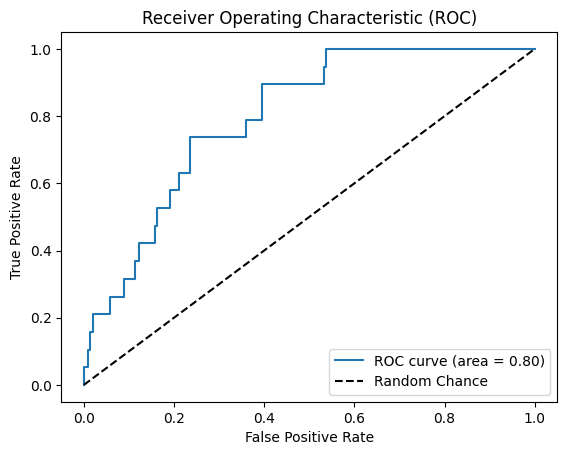

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

model = SVC(probability=True)

model.fit(X_train_selected, y_train)
y_pred_prob = model.predict(X_test_selected)

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
print(coefficients)

Accuracy: 0.9144144144144144
Root Mean Squared Error: 0.29255014200233365
R-squared: 0.9144144144144144
              Feature  Coefficient
0                 loc     0.331957
1                v(g)    -0.002415
2               ev(g)    -0.001002
3               iv(g)    -0.006381
4                   n    -3.822926
5                   v     0.000355
6                   d    -0.002835
7                   i    -0.000802
8                   e     0.069690
9                   b    -1.341790
10                  t    -1.254426
11             lOCode    -0.332591
12          lOComment     0.002000
13            lOBlank    -0.324915
14  locCodeAndComment     0.001237
15            uniq_Op     0.000029
16          uniq_Opnd     0.005028
17           total_Op     3.823803
18         total_Opnd     3.823250
19        branchCount     0.000976


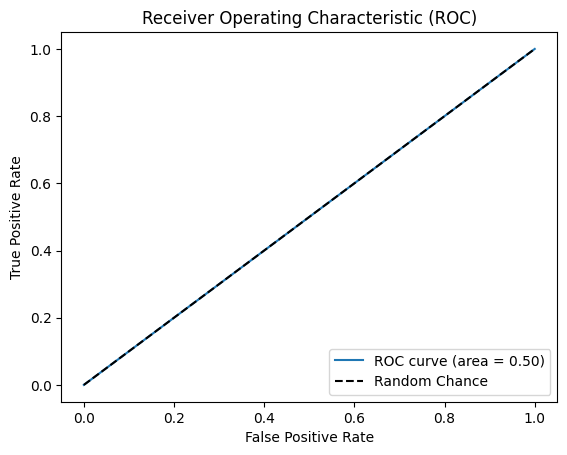

In [8]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test_selected)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
print(coefficients)

Accuracy: 0.9144144144144144
Confusion Matrix:
[[201   2]
 [ 17   2]]
AUC: 0.6033186414311641
Root Mean Squared Error: 0.29255014200233365
R-squared: 0.9144144144144144
              Feature  Coefficient
0                 loc     0.331957
1                v(g)    -0.002415
2               ev(g)    -0.001002
3               iv(g)    -0.006381
4                   n    -3.822926
5                   v     0.000355
6                   d    -0.002835
7                   i    -0.000802
8                   e     0.069690
9                   b    -1.341790
10                  t    -1.254426
11             lOCode    -0.332591
12          lOComment     0.002000
13            lOBlank    -0.324915
14  locCodeAndComment     0.001237
15            uniq_Op     0.000029
16          uniq_Opnd     0.005028
17           total_Op     3.823803
18         total_Opnd     3.823250
19        branchCount     0.000976


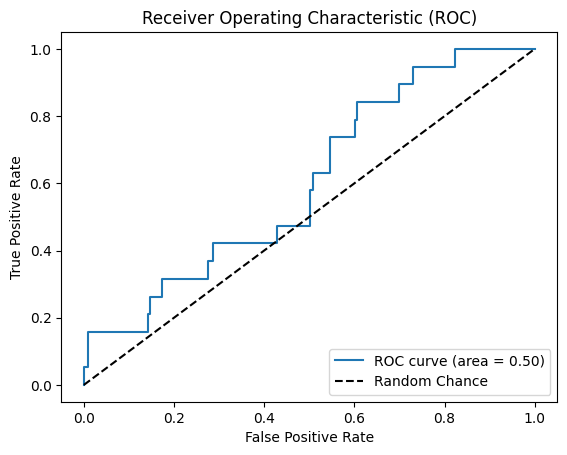

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()